## SPUR Densification Survey- Natural Langugage Processing Project
notebook author: Emily Robitschek

#### Background information on survey: 
This survey was conducted by the SPUR group at ETH: https://spur.ethz.ch/

#### Hypothesis/Research question: 
Can we use the open text field responses from densification surveys to infer something about the motivations behind why individuals responded the way they did to the densification survey?

## Stage 2: Exploration of the pre-processed data with word clouds
For an initial qualitative look at the questions of whether the words in the text responses vary with some of the survey questions, word clouds were generated

In [1]:
## import necessary packages: 
import pandas as pd
import numpy as np

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Create stopword list:
from nltk.corpus import stopwords
stopwords_wc = set(stopwords.words('english'))

#add some words relevant to my data that don't add to the interpretability of the word cloud
stopwords_wc.update(["proposal", "proposals", "Thank", "Thanks", 
                     "really", "survey", 
                     "much", "generally", "generally", "general", 
                     "chose", "1", "2"])

In [2]:
## Helper functions

def make_wordcloud(df, response_col, condition_col, condition, output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc): 
    """Takes in a dataframe (df) with a text response column (response_col) and a column to filter subgroups of responses by 
    another variable (condition_col) and what condition that variable should be for those responses to be included (condition).
    The output directory (output_dir) and figure name (fig_name) and size can be specified, along with what stopword list to use. 
    If not using any stop words, just make as an empty list. Outputs a word cloud of the top 100 words maximum of the set of 
    specified test responses"""
    text = " ".join(response for response in df[df[condition_col]==condition][response_col])
    print ("There are {} words in the combination of all review.".format(len(text)))
    wordcloud = WordCloud(max_words=100, stopwords=stopwords_wc, 
                          background_color="white", width=width, height=height).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    if len(stopwords) != 0:
        file_name=(output_dir + fig_name + ('_minus_stops_v1.png')) 
    else:
        file_name=(output_dir + fig_name + ('_w_stops_v1.png')) 
    plt.savefig((file_name), dpi=300, bbox_inches='tight')
    plt.show()
    
output_dir = '../../figures/wordclouds/'



### Load data

In [3]:
subset_col = 'Q12.6_corrected' #specify corrected text column
wc_df = pd.read_csv('../../datasets/spur_survey_response_filtered_df1.txt', sep='\t')
wc_df.head()

,StartDate,EndDate,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,LocationLatitude,LocationLongitude,UserLanguage,...,Q14.1_1,Q14.3,Q14.5,Q14.7,Q14.9,age,city,country,Q12.6_corrected,response_char_length
0,18.02.21 06:18,18.02.21 06:23,100.0,300.0,Richtig,18.02.21 06:23,R_10PI5FKTTlId8Ec,41.606201,-87.259300,EN-GB,...,5.0,6.0,6.0,Quite concerned,Neither,18-24,Chicago,United States,I'm not yo I'm not talking to you,34
1,18.02.21 06:41,18.02.21 06:55,100.0,894.0,Richtig,18.02.21 06:55,R_1gduid1fizdQ4d8,37.983398,-122.031204,EN-GB,...,6.0,9.0,9.0,Very concerned,Very concerned,35-44,Chicago,United States,It is the way it is,19
2,18.02.21 06:45,18.02.21 06:57,100.0,681.0,Richtig,18.02.21 06:57,R_23WCgmyuPAy3b1G,41.741501,-87.596199,EN-GB,...,1.0,9.0,4.0,Very concerned,Very concerned,18-24,Chicago,United States,Because it would be more fair to people that d...,60
3,18.02.21 06:56,18.02.21 07:11,100.0,941.0,Richtig,18.02.21 07:11,R_1pLEMXp5iJbankG,41.920898,-87.704300,EN-GB,...,7.0,10.0,5.0,Neither,Neither,35-44,Chicago,United States,I choose proposal 2 because you offered me bet...,74
4,18.02.21 09:38,18.02.21 09:50,100.0,676.0,Richtig,18.02.21 09:50,R_2OYEXKWutkzQOmS,42.048706,-87.890503,EN-GB,...,1.0,8.0,9.0,Very concerned,Very concerned,18-24,Chicago,United States,Because I felt like it wouldn't be good enough...,54


### Test with one response

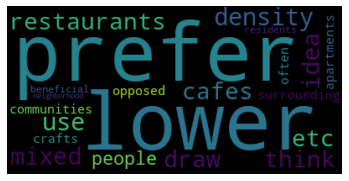

In [4]:
text = wc_df[subset_col][5]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Test with overall data

There are 350842 words in the combination of all review.


<Figure size 288x288 with 0 Axes>

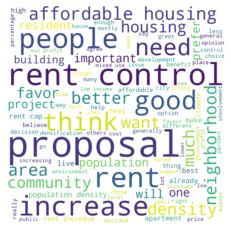

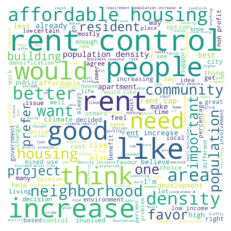

In [5]:
text = " ".join(response for response in wc_df[subset_col])
print ("There are {} words in the combination of all review.".format(len(text)))

# lower max_font_size, change the maximum number of word and lighten the background (for word cloud):
wordcloud = WordCloud(max_words=100, background_color="white", width=1000, height=1000).generate(text)
plt.figure(figsize=(4,4))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the image in the img folder:
#wordcloud.to_file(output_dir + "all_words.png")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords_wc, background_color="white", width=1000, height=1000).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
#wordcloud.to_file(output_dir + "all_words_minus_stops.png")

There are 93613 words in the combination of all review.


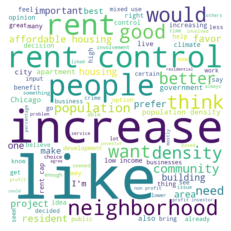

There are 99869 words in the combination of all review.


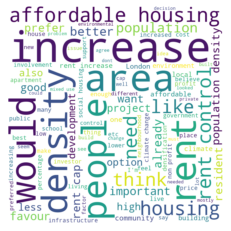

There are 83464 words in the combination of all review.


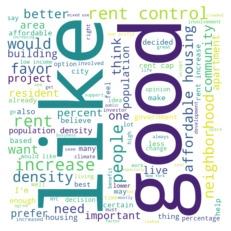

There are 73893 words in the combination of all review.


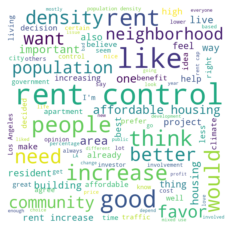

There are 40169 words in the combination of all review.


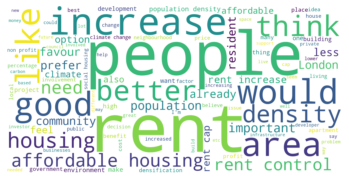

There are 85702 words in the combination of all review.


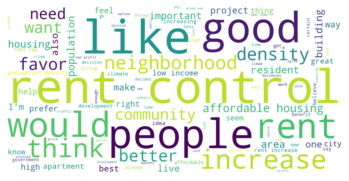

In [6]:

#city comparisons
fig_name = 'words_chicago'
make_wordcloud(wc_df, subset_col, 'city', 'Chicago', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'words_london'
make_wordcloud(wc_df, subset_col, 'city', 'London', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'words_nyc'
make_wordcloud(wc_df, subset_col, 'city', 'New York', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'words_la'
make_wordcloud(wc_df, subset_col, 'city', 'Los Angeles', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

'''
#climate concern comparisons
fig_name = 'very_climate_concerned_14.9'
make_wordcloud(wc_df, subset_col, 'Q14.9', 'Very concerned', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'not_climate_concerned_14.9'
make_wordcloud(wc_df, subset_col, 'Q14.9', 'Not concerned', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

#frame comparisons
fig_name = 'neighborhood_frame'
make_wordcloud(wc_df, subset_col, 'frame', 'neighborhood', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'district_frame'
make_wordcloud(wc_df, subset_col, 'frame', 'district', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'other_district_frame'
make_wordcloud(wc_df, subset_col, 'frame', 'other district', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

#acceptance of densification projects comparisons
print("ACCEPT BEFORE...")
fig_name = 'always_accept_dens_projects_6.1'
make_wordcloud(wc_df, subset_col, 'Q6.1', 'always accept', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

print("AFTER...")
fig_name = 'always_accept_dens_projects_7.5'
make_wordcloud(wc_df, subset_col, 'Q7.5', 'always accept', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
print("REJECT BEFORE...")
fig_name = 'always_reject_dens_projects_6.1'
make_wordcloud(wc_df, subset_col, 'Q6.1', 'always reject', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

print("AFTER...")
fig_name = 'always_reject_dens_projects_7.5'
make_wordcloud(wc_df, subset_col, 'Q7.5', 'always reject', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

#acceptance of densification projects comparisons by city 
fig_name = 'london_always_reject_dens_projects_7.5'
make_wordcloud(wc_df[wc_df['city']=='London'], subset_col, 'Q7.5', 'always reject', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'chicago_always_reject_dens_projects_7.5'
make_wordcloud(wc_df[wc_df['city']=='Chicago'], subset_col, 'Q7.5', 'always reject', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'la_always_reject_dens_projects_7.5'
make_wordcloud(wc_df[wc_df['city']=='Los Angeles'], subset_col, 'Q7.5', 'always reject', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'nyc_always_reject_dens_projects_7.5'
make_wordcloud(wc_df[wc_df['city']=='New York'], subset_col, 'Q7.5', 'always reject', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

#acceptance of densification projects comparisons by frame
fig_name = 'neighborhood_frame_always_reject_dens_projects_7.5'
make_wordcloud(wc_df[wc_df['frame']=='neighborhood'], subset_col, 'Q7.5', 'always reject', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'other_district_frame_always_reject_dens_projects_7.5'
make_wordcloud(wc_df[wc_df['frame']=='other district'], subset_col, 'Q7.5', 'always reject', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

#frame and gender 
fig_name = 'neighborhood_frame_female_3.1'
make_wordcloud(wc_df[wc_df['frame']=='neighborhood'], subset_col, 'Q3.1', 'Female', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'neighborhood_frame_male_3.1'
make_wordcloud(wc_df[wc_df['frame']=='neighborhood'], subset_col, 'Q3.1', 'Male', output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)

#frame and gender 
fig_name = 'neighborhood_frame_minority_yes'
make_wordcloud(wc_df[wc_df['frame']=='neighborhood'], subset_col, 'minority', 1, output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
fig_name = 'neighborhood_frame_male_minority_no'
make_wordcloud(wc_df[wc_df['frame']=='neighborhood'], subset_col, 'minority', 0, output_dir, fig_name, width=800, height=800, stopwords=stopwords_wc)
'''

#minorities and country 
fig_name = 'london_minority_yes'
make_wordcloud(wc_df[wc_df['city']=='London'], subset_col, 'minority', 1, 
               output_dir, fig_name, width=1600, height=800, stopwords=stopwords_wc)
fig_name = 'usa_cities_minority_yes'
make_wordcloud(wc_df[wc_df['city'].isin(['Chicago', 'Los Angeles', 'NYC'])], subset_col, 'minority', 1, 
               output_dir, fig_name, width=1600, height=800, stopwords=stopwords_wc)


These wordclouds show the top 100 words across all survey responses, and for respondents by city, even recovering the respective city names for each city. Such an approach also hints at potential key differences between survey respondents who for instance would always favor densification projects and those who would always reject them. Upon qualitative inspection, one can notice overlapping concerns in the presence of words like “density”, “increase”, “prefer” and “rent”, in all the subpopulations. As we might expect, there is an enrichment of words with a positive connotation (e.g. “good”, “love”, “yes”, “helpful”, “best”, “benefit”, “great”) for those respondents who would agree to the projects and the appearance of words with a negative or resistant connotation like “already”, “bad”, “dislike” in the responses of those who would reject densification policies.  More specific terms like “crime”, “parking”, “crowded”, “overcrowding” and “overpopulated” also appear in the responses of those who would reject densification policies, which provides some insights into the reasons they might not support them. Therefore, while qualitative and not directly statistically comparable, these word clouds already show the potential for the contents of this text response data to align with existing survey elements (e.g. densification project preference) and to reveal new insights that may not be fully captured in other survey questions (e.g. some of the specific reasons why some participants don’t support densification projects). Some other examples based on climate concern and minority status are also included.